<a href="https://colab.research.google.com/github/mark1702/mark/blob/master/hoc_may_thong_ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the and function

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [3]:
for i in range(len(X)):
    print(X[i], y[i])

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [4]:
def add_noise_data(input_data, input_labels, n_points, mean, scale):
    """
    Create a noise verstion of the input data

    Params:
        input_data: base input data
        input_labels: base input labels
        n_points: the number of needed points
        mean, scale: the gaussian data
    """
    raw_X = []
    raw_labels = []

    noise = np.random.normal(loc=mean, scale=scale, size=(n_points, 2))
    for i in range(n_points):
        k = np.random.randint(len(input_data))

        raw_X.append([input_data[k][0] + noise[i][0],
                      input_data[k][1] + noise[i][1]])

        raw_labels.append(input_labels[k])

    return np.array(raw_X), np.array(raw_labels)

In [5]:
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

In [6]:
def plot_clusters(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

(82, 2)
(18, 2)


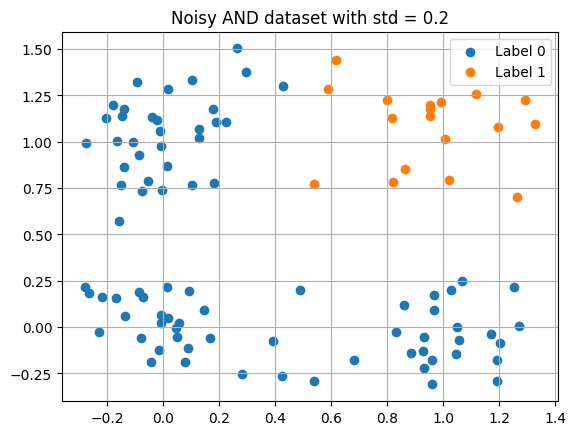

In [7]:
plot_clusters(X_noise, y_noise, 0.2, list_labels=['Label 0', 'Label 1'])

(71, 2)
(29, 2)


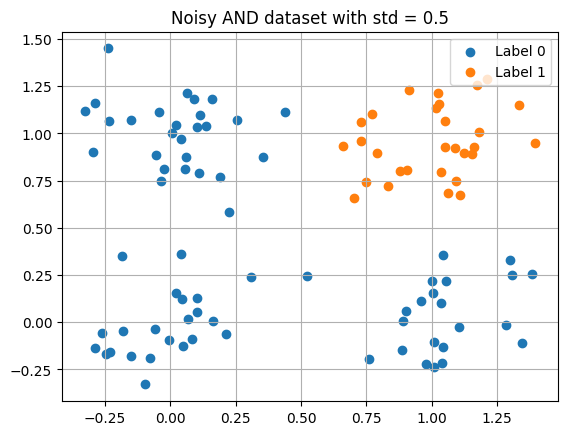

In [42]:
X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.2)
plot_clusters(X_high_noise, y_high_noise, 0.5, list_labels=['Label 0', 'Label 1'])

In [14]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])

(1.1, -0.2) 0
(1.1, 0.2) 0
(0.2, 1.0) 0
(0.8, 0.0) 0
(1.1, -0.1) 0
(0.9, 1.0) 1
(1.2, 0.8) 1
(0.9, -0.2) 0
(1.0, 1.0) 1
(0.0, 1.1) 0
(0.0, 0.5) 0
(-0.0, 0.1) 0
(1.1, 0.7) 1
(0.8, -0.1) 0
(0.3, -0.0) 0
(1.2, 1.1) 1
(-0.1, 0.6) 0
(0.2, 1.0) 0
(1.0, 0.8) 1
(-0.0, 0.1) 0


In [15]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])


y_high_noise = np.expand_dims(y_high_noise, axis=1)
# print(y_high_noise.shape)

(1.1, -0.2) 0
(1.1, 0.2) 0
(0.2, 1.0) 0
(0.8, 0.0) 0
(1.1, -0.1) 0
(0.9, 1.0) 1
(1.2, 0.8) 1
(0.9, -0.2) 0
(1.0, 1.0) 1
(0.0, 1.1) 0
(0.0, 0.5) 0
(-0.0, 0.1) 0
(1.1, 0.7) 1
(0.8, -0.1) 0
(0.3, -0.0) 0
(1.2, 1.1) 1
(-0.1, 0.6) 0
(0.2, 1.0) 0
(1.0, 0.8) 1
(-0.0, 0.1) 0


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def plot_clusters_after_cluster(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34', '#fff899']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

In [43]:
epoch = 200
lr = 0.05
w0 = np.random.randn(1, 1)
w = np.random.randn(1, 2)
# z = W.T * x + W0
# y_hat = sigmoid(z)
# loss = 0.5 * np.square(y_hat - y)
# dw = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * X
# dw0 = (y_hat - y) * sigmoid(z) * (1 - sigmoid(z)) * 1
out_array = []
for iter in range(epoch):
    for idx, x_noise in enumerate(X_high_noise):
        z = np.add(np.dot(x_noise, w.T), w0)
        y_hat = sigmoid(z)
        loss = 0.5 * np.square(y_hat - y_high_noise[idx])
        dw = (y_hat - y_high_noise[idx]) * sigmoid(z) * (1 - sigmoid(z)) * x_noise
        dw0 = (y_hat - y_high_noise[idx]) * sigmoid(z) * (1 - sigmoid(z)) * 1
        w -= lr * dw
        w0 -= lr * dw0
        if iter == 199:
          out_array.append([x_noise[0], x_noise[1], y_hat[0][0], y_high_noise[idx]])
          # print(f"epoch {iter}: loss:{loss}. Raw {y_high_noise[idx]} Predict {y_hat}")
out_array = np.array(out_array)
print("W:", w)
print("W0:", w0)
print("Error rate: {}".format((np.absolute(out_array[:,3] - out_array[:,2]) > 0.5).sum() / len(X_high_noise)))

W: [[3.43918432 3.57432205]]
W0: [[-5.43024754]]
Error rate: 0.05
